# Chapter 13 - Loading and Preprocessing Data with TensorFlow

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= '2.0'

In [4]:
# Common imports
import numpy as np
import os

In [5]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Datasets

Let's create a dataset entirely in RAM:

In [8]:
X = tf.range(10)
X

<tf.Tensor: id=3, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

Equivalently:

In [10]:
dataset = tf.data.Dataset.range(10)

Simply iterate over a dataset's items like this:

In [11]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


### Chaining Transformations

In [12]:
dataset = dataset.repeat(3).batch(7)

for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [13]:
dataset = dataset.map(lambda x: x * 2)

In [14]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [16]:
dataset = dataset.apply(tf.data.experimental.unbatch())
dataset

<_UnbatchDataset shapes: (), types: tf.int64>

In [17]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

In [18]:
dataset = dataset.filter(lambda x: x < 10)

In [19]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


### Shuffling the Data

In [20]:
tf.random.set_seed(42)

In [21]:
dataset = tf.data.Dataset.range(10).repeat(3)

for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype

In [22]:
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)

for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


## Split the California Dataset to Multiple CSV Files


Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it:

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
                       housing.data, housing.target.reshape(-1, 1), random_state=42)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_mean = scaler.mean_

In [31]:
X_std = scaler.scale_

For a very large dataset that does not fit in memory, you will typically want to split it into many files first, then have TensorFlow read these files in parallel. To demonstrate this, let's start by splitting the housing dataset and save it to 20 CSV files:

In [32]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    
    housing_dir = os.path.join('datasets', 'housing')
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, 'my_{}_{:02d}.csv')
    
    filepaths = []
    m = len(data)
    
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, 'wt', encoding='utf-8') as f:
            if header is not None:
                f.write(header)
                f.write('\n')
            for row_idx in row_indices:
                f.write(','.join([repr(col) for col in data[row_idx]]))
                f.write('\n')
    return filepaths

In [33]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]

In [34]:
header_cols = housing.feature_names + ['MedianHouseValue']
header = ','.join(header_cols)

In [35]:
train_filepaths = save_to_multiple_csv_files(train_data, 'train', header, n_parts=20)

In [36]:
valid_filepaths = save_to_multiple_csv_files(valid_data, 'valid', header, n_parts=10)

In [37]:
test_filepaths = save_to_multiple_csv_files(test_data, 'test', header, n_parts=10)

Okay, now let's take a peek at the first few lines of one of these CSV files:

In [39]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


Or in text mode:

In [40]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end='')

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [41]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

## Build an Input Pipeline

In [42]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [43]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_04.csv', shape=(), dtype=string)
tf.Ten

In [44]:
n_readers = 5

dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [45]:
for line in dataset.take(5):
    print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


Notice that field 4 is interpreted as a string.

In [47]:
record_defaults = [0, np.nan, 
                   tf.constant(np.nan, dtype=tf.float64), 
                   'Hello', tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: id=374, shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: id=375, shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: id=376, shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: id=377, shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: id=378, shape=(), dtype=float32, numpy=5.0>]

Notice that all missing fields are replaced with their default value, when provided:

In [48]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: id=388, shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: id=389, shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: id=390, shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: id=391, shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: id=392, shape=(), dtype=float32, numpy=5.0>]

The 5th field is compulsory (since we provided tf.constant([]) as the "default value"), so we get an exception if we do not provide it:

In [49]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


The number of fields should match exactly the number of fields in the record_defaults:

In [50]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [51]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [52]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: id=436, shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: id=437, shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

## Putting Everything Together

In [53]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    
    return dataset.prefetch(1)

In [54]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



In [55]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [58]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [59]:
batch_size = 32
model.fit(train_set, 
          steps_per_epoch=len(X_train) // batch_size,
          epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 1s 3ms/step - loss: 1.6094 - val_loss: 0.8233
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: 0.7279 - val_loss: 0.6573
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6146 - val_loss: 0.6021
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6153 - val_loss: 0.5703
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5801 - val_loss: 0.5665
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5339 - val_loss: 0.6860
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5404 - val_loss: 0.4995
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5164 - val_loss: 0.5397
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5003 - val_loss: 0.4683
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: 0.4903 - val_loss: 0.4980

In [60]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 1ms/step - loss: 0.4780


0.47797984680774047

In [61]:
new_set = test_set.map(lambda X, y: X)
# we could instead just pass test_set, Keras would ignore the labels

In [62]:
X_new = X_test

In [63]:
model.predict(new_set, steps=len(X_new) // batch_size)

array([[1.4881988],
       [1.4371501],
       [1.0799305],
       ...,
       [1.2106774],
       [2.9503095],
       [1.2605503]], dtype=float32)

In [64]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

In [65]:
n_epochs = 5
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
total_steps = n_epochs * n_steps_per_epoch
global_step = 0

In [ ]:
for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1
    print('\rGlobal step {}/{}'.format(global_step, total_steps, end=''))
    with tf.GradientTape() as tape:
        y_pred = model(X_batch)
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
        loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

In [70]:
@tf.function
def train(model, n_epochs, batch_size=32, n_readers=5, n_read_threads=5,
          shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths,
                                   repeat=n_epochs,
                                   n_readers=n_readers,
                                   n_read_threads=n_read_threads,
                                   shuffle_buffer_size=shuffle_buffer_size,
                                   n_parse_threads=n_parse_threads,
                                   batch_size=batch_size)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [71]:
train(model, 5)

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


Here is a short description of each method in the `Dataset` class:

In [74]:
for m in dir(tf.data.Dataset):
    if not (m.startswith('_')):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, '__doc__'):
            print('· {:21s}{}'.format(m + '()', func.__doc__.split('\n')[0]))

· apply()              Applies a transformation function to this dataset.
· batch()              Combines consecutive elements of this dataset into batches.
· cache()              Caches the elements in this dataset.
· concatenate()        Creates a `Dataset` by concatenating given dataset with this dataset.
· filter()             Filters this dataset according to `predicate`.
· flat_map()           Maps `map_func` across this dataset and flattens the result.
· from_generator()     Creates a `Dataset` whose elements are generated by `generator`.
· from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
· from_tensors()       Creates a `Dataset` with a single element, comprising the given tensors.
· interleave()         Maps `map_func` across this dataset, and interleaves the results.
· list_files()         A dataset of all files matching one or more glob patterns.
· map()                Maps `map_func` across the elements of this dataset.
· options()   

## The `TFRecord` Binary Format

A TFRecord file is just a list of binary records. You can create one using a `tf.io.TFRecordWriter`:

In [75]:
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b'This is the first record')
    f.write(b'And this is the second record')

And you can read it using a `tf.data.TFRecordDataset`:

In [76]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)

for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


You can read multiple `TFRecord` files with just one `TFRecordDataset`. By default it will read them one at a time, but if you set `num_parallel_reads=3`, it will read 3 at a time in parallel and interleave their records:

In [77]:
filepaths = ['my_test_{}.tfrecord'.format(i) for i in range(5)]

for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write('File {} record {}'.format(i, j).encode('utf-8'))

In [79]:
dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)

for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


### Compressed TFRecord Files

In [80]:
options = tf.io.TFRecordOptions(compression_type='GZIP')

with tf.io.TFRecordWriter('my_compressed.tfrecord', options) as f:
    f.write(b'This is the first record')
    f.write(b'And this is the second')

In [81]:
dataset = tf.data.TFRecordDataset(['my_compressed.tfrecord'],
                                  compression_type='GZIP')

for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second', shape=(), dtype=string)


### A Brief Intro to Protocol Buffers


For this section you need to install `protobuf`. In general you will not have to do so when using TensorFlow, as it comes with functions to create and parse protocol buffers of type `tf.train.Example`, which are generally sufficient. However, in this section we will learn about protocol buffers by creating our own simple protobuf definition, so we need the `protobuf compiler` (protoc): we will use it to compile the protobuf definition to a Python module that we can then use in our code.

First let's write a simple protobuf definition:

In [82]:
%%writefile person.proto
syntax = 'proto3'
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email =3;
}

Writing person.proto


And let's compile it (the `--descriptor_set_out` and `--include_imports` options are only required for the `tf.io.decode_proto()` example below):

In [83]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

person.proto:2:1: Expected ";".


In [84]:
!ls person*

person.proto


In [ ]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # display the Person

### TensorFlow Protobufs

In [86]:
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List

Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

In [88]:
person_example = Example(
    features=Features(
        feature={
            'name': Feature(bytes_list=BytesList(value=[b'Alice'])),
            'id': Feature(int64_list=Int64List(value=[123])),
            'emails': Feature(bytes_list=BytesList(value=[b'a@b.com', b'c@d.com']))
        }))

In [89]:
with tf.io.TFRecordWriter('my_contacts.tfrecord') as f:
    f.write(person_example.SerializeToString())

### Loading and Parsing Examples

In [92]:
feature_description = {
    'name': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'id': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'emails': tf.io.VarLenFeature(tf.string)
}

In [93]:
for serialized_example in tf.data.TFRecordDataset(['my_contacts.tfrecord']):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [94]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f9edf1c7390>,
 'id': <tf.Tensor: id=536154, shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: id=536155, shape=(), dtype=string, numpy=b'Alice'>}

In [95]:
parsed_example['emails'].values[0]

<tf.Tensor: id=536161, shape=(), dtype=string, numpy=b'a@b.com'>

In [96]:
tf.sparse.to_dense(parsed_example['emails'], default_value=b'')

<tf.Tensor: id=536164, shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [97]:
parsed_example['emails'].values

<tf.Tensor: id=536152, shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

## Putting Images in TFRecords

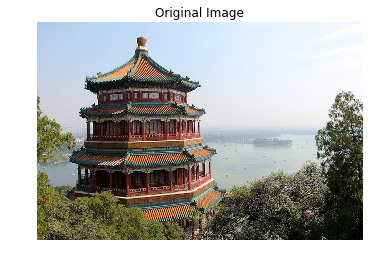

In [98]:
from sklearn.datasets import load_sample_images

img = load_sample_images()['images'][0]
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [99]:
data = tf.io.encode_jpeg(img)

example_with_image = Example(features=Features(feature={
    'image': Feature(bytes_list=BytesList(value=[data.numpy()]))
}))

In [100]:
serialized_example = example_with_image.SerializeToString()

In [101]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

Or use `decode_image()` which supports BMP, GIF, JPEG and PNG formats:

In [102]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

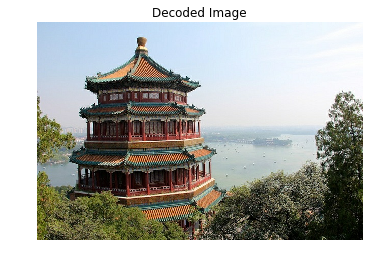

In [103]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

## Putting Tensors and Sparse Tensors in TFRecords


Tensors can be serialized and parsed easily using `tf.io.serialize_tensor()` and `tf.io.parse_tensor()`:

In [104]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
s

<tf.Tensor: id=536199, shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [105]:
tf.io.parse_tensor(s, out_type=tf.float32)

<tf.Tensor: id=536201, shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [106]:
serialized_sparse = tf.io.serialize_sparse(parsed_example["emails"])
serialized_sparse

<tf.Tensor: id=536203, shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [107]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\001\"\020\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"\020\007\007a@b.comc@d.com"
value: "\010\t\022\004\022\002\010\001\"\010\002\000\000\000\000\000\000\000"

In [108]:
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)

for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [109]:
parsed_examples

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f9eddd6d400>}

## Handling Sequential Data Using `SequenceExample`

In [110]:
FeatureList = tf.train.FeatureList
FeatureLists = tf.train.FeatureLists
SequenceExample = tf.train.SequenceExample

In [112]:
context = Features(feature={
    'author_id': Feature(int64_list=Int64List(value=[123])),
    'title': Feature(bytes_list=BytesList(value=[b'A', b'desert', b'place', b'.'])),
    'pub_date': Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

In [113]:
content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]

In [114]:
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

In [115]:
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode('utf-8') for word in words]))

In [116]:
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

In [117]:
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        'content': FeatureList(feature=content_features),
        'comments': FeatureList(feature=comments_features)
    })
)

In [118]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [119]:
serialized_sequence_example = sequence_example.SerializeToString()

In [120]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

In [121]:
parsed_context

{'author_id': <tf.Tensor: id=536249, shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: id=536250, shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>,
 'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f9edf1606d8>}

In [122]:
parsed_context["title"].values

<tf.Tensor: id=536247, shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [123]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f9edead7550>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f9edead72b0>}

In [124]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


## The Features API


Let's use the variant of the California housing dataset, since it contains categorical features and missing values:

In [125]:
import os
import tarfile
import urllib

In [126]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [127]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [128]:
fetch_housing_data()

In [129]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [131]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [132]:
housing_median_age = tf.feature_column.numeric_column('housing_median_age')

In [133]:
age_mean, age_std = X_mean[1], X_std[1] # The median age is column in 1

In [135]:
housing_median_age = tf.feature_column.numeric_column(
    'housing_median_age', normalizer_fn=lambda x: (x - age_mean) / age_std)

In [136]:
median_income = tf.feature_column.numeric_column('nedian_income')
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.])

In [137]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='nedian_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

In [138]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

In [139]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [140]:
# Just an example, it's not used later on
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [141]:
bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.]) # age was scaled
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100)

In [142]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")
bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1)))
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000)

In [143]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

In [144]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity,
                                                           dimension=2)

## Using Feature Columns for Parsing

In [145]:
median_house_value = tf.feature_column.numeric_column('median_house_value')

In [146]:
columns = [housing_median_age, median_house_value]
feature_descriptions = tf.feature_column.make_parse_example_spec(columns)
feature_descriptions

{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [147]:
with tf.io.TFRecordWriter("my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())

In [148]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [149]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_descriptions)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

In [150]:
columns_without_target = columns[:-1]

model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])

model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Epoch 1/5
Instructions for updating:
Use `tf.cast` instead.
362/362 [==============================] - 3s 7ms/step - loss: 3.7619 - accuracy: 8.8428e-04
Epoch 2/5
362/362 [==============================] - 3s 7ms/step - loss: 1.9311 - accuracy: 0.0021
Epoch 3/5
362/362 [==============================] - 3s 8ms/step - loss: 1.4434 - accuracy: 0.0032
Epoch 4/5
362/362 [==============================] - 3s 7ms/step - loss: 1.3579 - accuracy: 0.0033
Epoch 5/5
362/362 [==============================] - 3s 8ms/step - loss: 1.3473 - accuracy: 0.0034


## Preprocessing the Input Features

In [152]:
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()

In [153]:
model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),
    keras.layers.Dense(1)
])

In [154]:
class Standardization(keras.layers.Layer):
    
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [155]:
std_layer = Standardization()
std_layer.adapt(X_train)

In [156]:
model = keras.models.Sequential()
model.add(std_layer)
model.add(keras.layers.Dense(1))

In [157]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

## Encoding Categorical Features using One-Hot Vectors

In [161]:
vocab = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [162]:
indices = tf.range(len(vocab), dtype=tf.int64)

In [163]:
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)

In [164]:
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

Now, let's use the lookup table to encode a small batch of categorical features to one-hot vectors:

In [165]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])

In [166]:
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: id=773626, shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [167]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: id=773631, shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

## Encoding Categorical Features using Embeddings

In [168]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)

In [169]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.7402308 , 0.33938193],
       [0.5692506 , 0.44811392],
       [0.29285502, 0.4260056 ],
       [0.62890387, 0.691061  ],
       [0.30925727, 0.89236605],
       [0.66396606, 0.30541587],
       [0.8724164 , 0.1025728 ]], dtype=float32)>

In [170]:
categories = tf.constant(['NEAR BAY', 'DESERT', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: id=773654, shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [171]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: id=773656, shape=(4, 2), dtype=float32, numpy=
array([[0.62890387, 0.691061  ],
       [0.66396606, 0.30541587],
       [0.5692506 , 0.44811392],
       [0.5692506 , 0.44811392]], dtype=float32)>

In [172]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets,
                                   output_dim=embedding_dim)

In [173]:
embedding(cat_indices)

<tf.Tensor: id=773675, shape=(4, 2), dtype=float32, numpy=
array([[ 0.01379195, -0.02229853],
       [ 0.0406372 , -0.0277444 ],
       [-0.01294596,  0.04118674],
       [-0.01294596,  0.04118674]], dtype=float32)>

In [174]:
regular_inputs = keras.layers.Input(shape=[8])

categories = keras.layers.Input(shape=[], dtype=tf.string)

cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)

cat_embed = keras.layers.Embedding(input_dim=6,
                                   output_dim=2)(cat_indices)

In [175]:
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])

In [176]:
outputs = keras.layers.Dense(1)(encoded_inputs)

In [179]:
model = keras.models.Model(inputs=[regular_inputs, categories],
                           outputs=[outputs])

## Keras Preprocessing Layers

Preprocessing pipeline:

In [ ]:
normailization = keras.layers.Normalization()
discretization = keras.layers.Discretization()

pipeline = keras.layers.PreprocessingStage([normailization, discretization])
pipeline.adapt(data_sample)

## TF Transform

In [182]:
try:
    import tensorflow_transform as tft
    
    def preprocessing(inputs): # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
    
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


## The TensorFlow Datasets (TFDS) Project

In [184]:
import tensorflow_datasets as tfds

In [185]:
dataset = tfds.load(name='mnist')

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



A Jupyter Widget



Dataset mnist downloaded and prepared to /Users/dongdongdongdong/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [186]:
mnist_train, mnist_test = dataset['train'], dataset['test']

In [187]:
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'ai2_arc', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'forest_fires', 'fuss', 'gap',

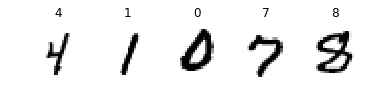

In [188]:
plt.figure(figsize=(6, 3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)

for item in mnist_train:
    images = item['image']
    labels = item['label']
    for index in range(5):
        plt.subplot(1, 5, index+1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap='binary')
        plt.title(label)
        plt.axis('off')
    break # just showing part of the first batch

In [194]:
datasets = tfds.load(name='mnist')

mnist_train, mnist_test = datasets['train'], datasets['test']
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items['image'], items['label']))
mnist_train = mnist_train.prefetch(1)

for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [195]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Or:

In [196]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation='softmax')
])

In [198]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
lambda (Lambda)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [200]:
model.fit(mnist_train, 
          steps_per_epoch=60000 // 32,
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 31.9306 - accuracy: 0.8424
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 25.5098 - accuracy: 0.8700
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 25.0437 - accuracy: 0.8723
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 24.4942 - accuracy: 0.8760
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 24.1017 - accuracy: 0.8778


## TensorFlow Hub

In [201]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [203]:
import tensorflow_hub as hub

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                           output_shape=[50], input_shape=[], dtype=tf.string)

model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
sentences = tf.constant(["It was a great movie", "The actors were amazing"])
embeddings = hub_layer(sentences)

In [ ]:
embeddings